In [3]:
from sklearn import datasets
irisData=datasets.load_iris()
print("nombre d'instances du dataset:",len(irisData.data))
print("repartition des données par classe: ")
print("classe",irisData.target_names[0],"=",len([t for t in irisData.target if t==0 ]))
print("classe",irisData.target_names[1],"=",len([t for t in irisData.target if t==1 ]))
print("classe",irisData.target_names[2],"=",len([t for t in irisData.target if t==2]))
print("data de la 32e instance:",irisData.data[31])
print("classe de la 32e instance='",irisData.target_names[irisData.target[31]],"'")

nombre d'instances du dataset: 150
repartition des données par classe: 
classe setosa = 50
classe versicolor = 50
classe virginica = 50
data de la 32e instance: [5.4 3.4 1.5 0.4]
classe de la 32e instance=' setosa '


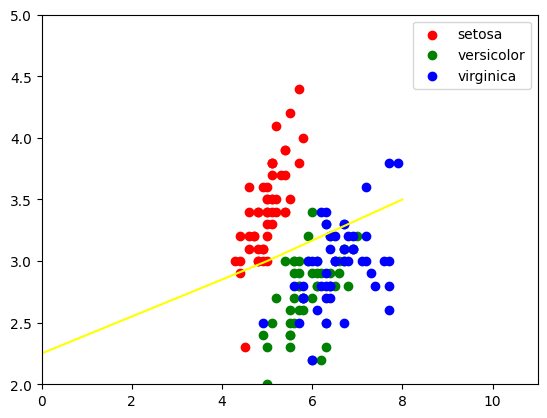

In [4]:
from itertools import cycle
import matplotlib
import pylab as pl
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
    pl.legend()
    pl.plot([0,5,8],[2.25,3,3.5],color="yellow")
    pl.xlim(0, 11)
    pl.ylim(2, 5)
    pl.show()
plot_2D(irisData.data,irisData.target,irisData.target_names)

In [5]:
 from sklearn import naive_bayes
 nbv1 = naive_bayes.MultinomialNB(fit_prior=True)
 irisData = datasets.load_iris()
 nbv1.fit(irisData.data[:], irisData.target[:])
 p31 = nbv1.predict(irisData.data)[31]
 print ("prediction de la classe de la 32e instance:",p31)
 plast = nbv1.predict(irisData.data)[-1]
 print ("prediction de la classe de la dernière instance:",plast)
 pv1 = nbv1.predict(irisData.data[:])
 print ("prediction des classes de toutes les instances:\n",pv1)

prediction de la classe de la 32e instance: 0
prediction de la classe de la dernière instance: 2
prediction des classes de toutes les instances:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#méthode 1
ea = 0
instances=[]
for i in range(len(irisData.data)):
    #compare predicted results to real target 
    if (pv1[i] != irisData.target[i]):
        ea = ea + 1
        instances.append(i)
print(ea / len(irisData.data))

#méthode 2
import numpy
print(numpy.count_nonzero(pv1-irisData.target)/len(irisData.target))

#méthode 3
print(1-nbv1.score(irisData.data,irisData.target))

#Instances où il y a eu des prédictions incorrectes
print("liste des instanes incorrectement classées :",instances)

0.04666666666666667
0.04666666666666667
0.046666666666666634
liste des instanes incorrectement classées : [68, 70, 72, 83, 129, 131, 133]


In [7]:
from sklearn import naive_bayes
nbv2 = naive_bayes.MultinomialNB(fit_prior=True)
nbv2.fit(irisData.data[:99], irisData.target[:99])
pv2=nbv2.predict(irisData.data[100:149])
print(pv2)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
ea = 0
instancesv2=[]
for i in range(0,49):
    #compare predicted results to real target 
    if (pv2[i] != irisData.target[i+100]):
        ea = ea + 1
        instancesv2.append(i+100)
print(ea / 49)
#méthode 2
import numpy
print(numpy.count_nonzero(pv2-irisData.target[100:149])/49)

#méthode 3
print(1-nbv2.score(irisData.data[100:149],irisData.target[100:149]))

#Instances où il y a eu des prédictions incorrectes
print("liste des instanes incorrectement classées :",instancesv2)

1.0
1.0
1.0
liste des instanes incorrectement classées : [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]


In [9]:
import random
from math import floor

def split(s): 
    length = len(s.data)
    training_data = []
    training_targets = []
    test_data = []
    test_targets = []

    # Générer et mélanger les indices
    indices = list(range(length))
    random.shuffle(indices)

    # Diviser les indices pour les ensembles d'entraînement et de test
    split_point = floor(length * 2 / 3)
    training_indices = indices[:split_point]
    test_indices = indices[split_point:]

    # Construire les ensembles d'entraînement
    for i in training_indices:
        training_data.append(s.data[i].tolist())
        training_targets.append(s.target[i])

    # Construire les ensembles de test
    for i in test_indices:
        test_data.append(s.data[i].tolist())
        test_targets.append(s.target[i])

    return [training_data, training_targets, test_data, test_targets]

data_split = split(irisData)    
print("Training data:")
print(data_split[0])
print("Training targets:")
print(data_split[1])
print("Test data:")
print(data_split[2])
print("Test targets:")
print(data_split[3])


Training data:
[[7.4, 2.8, 6.1, 1.9], [5.4, 3.4, 1.5, 0.4], [5.1, 3.5, 1.4, 0.2], [7.0, 3.2, 4.7, 1.4], [6.3, 3.3, 4.7, 1.6], [6.4, 2.8, 5.6, 2.2], [6.0, 2.2, 4.0, 1.0], [6.5, 3.0, 5.5, 1.8], [4.7, 3.2, 1.3, 0.2], [5.1, 3.8, 1.5, 0.3], [5.0, 3.3, 1.4, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.6, 2.9, 3.6, 1.3], [5.7, 4.4, 1.5, 0.4], [6.8, 3.0, 5.5, 2.1], [5.5, 2.3, 4.0, 1.3], [5.1, 3.3, 1.7, 0.5], [5.8, 2.8, 5.1, 2.4], [5.5, 2.6, 4.4, 1.2], [6.0, 3.4, 4.5, 1.6], [4.9, 2.5, 4.5, 1.7], [6.3, 3.4, 5.6, 2.4], [5.0, 3.0, 1.6, 0.2], [4.9, 2.4, 3.3, 1.0], [4.9, 3.1, 1.5, 0.2], [6.7, 2.5, 5.8, 1.8], [4.8, 3.4, 1.6, 0.2], [6.2, 2.8, 4.8, 1.8], [5.0, 3.6, 1.4, 0.2], [6.5, 3.0, 5.2, 2.0], [6.5, 3.0, 5.8, 2.2], [5.1, 2.5, 3.0, 1.1], [6.3, 3.3, 6.0, 2.5], [4.9, 3.6, 1.4, 0.1], [5.3, 3.7, 1.5, 0.2], [6.0, 3.0, 4.8, 1.8], [7.2, 3.6, 6.1, 2.5], [5.8, 2.7, 4.1, 1.0], [6.1, 3.0, 4.9, 1.8], [4.4, 3.0, 1.3, 0.2], [4.7, 3.2, 1.6, 0.2], [5.9, 3.0, 4.2, 1.5], [6.3, 2.5, 5.0, 1.9], [6.5, 3.2, 5.1, 

In [10]:
def test(s,clf):
    [training_data,training_targets,test_data,test_targets]=split(s)
    #apprentissage
    clf.fit(training_data,training_targets)
    #test
    prediction=clf.predict(test_data)
    #évaluation
    estimated_error=1-clf.score(test_data,test_targets)
    return estimated_error

In [11]:
#avec Naïve Bayes
print("erreur de Naïve Bayes Tentative 1",test(irisData,naive_bayes.MultinomialNB(fit_prior=True)))
print("erreur de Naïve Bayes Tentative 2",test(irisData,naive_bayes.MultinomialNB(fit_prior=True)))

erreur de Naïve Bayes Tentative 1 0.040000000000000036
erreur de Naïve Bayes Tentative 2 0.06000000000000005


In [12]:
def stabiliserErreur(s,clf,t):
        estimated_error=0
        for i in range(t):
            estimated_error=estimated_error+test(s,clf)
        return estimated_error/t
        
def repeterExperience(s,clf,times):
    estimated_errors=[]
    for i in range(len(times)):
        estimated_errors_for_t=[];
        for j in range(19):
            estimated_errors_for_t.append(stabiliserErreur(s,clf,times[i]))
        estimated_errors.append(estimated_errors_for_t)
    return estimated_errors
            
print(repeterExperience(s=irisData,clf=naive_bayes.MultinomialNB(fit_prior=True),times=[10,20,50,100,200,500,1000]))

[[0.20600000000000002, 0.21400000000000002, 0.138, 0.23800000000000004, 0.14400000000000004, 0.14400000000000002, 0.26999999999999996, 0.25399999999999995, 0.292, 0.146, 0.23800000000000004, 0.164, 0.23399999999999999, 0.22000000000000003, 0.26, 0.20800000000000005, 0.21800000000000003, 0.20800000000000002, 0.22599999999999998], [0.191, 0.17400000000000002, 0.12200000000000004, 0.25000000000000006, 0.168, 0.20800000000000002, 0.13900000000000004, 0.19699999999999995, 0.185, 0.169, 0.193, 0.17600000000000002, 0.18600000000000003, 0.21200000000000002, 0.20800000000000002, 0.17100000000000004, 0.23200000000000004, 0.21500000000000002, 0.23899999999999996], [0.22520000000000015, 0.21880000000000002, 0.22959999999999997, 0.18200000000000002, 0.2128, 0.18320000000000003, 0.17400000000000002, 0.18639999999999998, 0.21000000000000005, 0.23199999999999998, 0.19039999999999999, 0.25120000000000003, 0.23120000000000004, 0.24040000000000006, 0.20600000000000004, 0.2288, 0.18719999999999992, 0.1971

On voit que les erreurs se stabilisent vers la fin telles que pour:
 t=10: stabilisation à ~0.1 
 t=20: stabilisation à ~0.2 
 t=50: stabilisation à ~0.2 
 t=100: stabilisation à ~0.2 
 t=200: stabilisation à ~0.2 
 t=500: stabilisation à ~0.2
 t=1000: stabilisation à ~0.2

In [13]:
from sklearn.model_selection import train_test_split
def train_test_split_evaluation(s,clf,size):
    [training_data,test_data,training_targets,test_targets]=train_test_split(s.data,s.target,test_size=size,random_state=42)
    clf.fit(training_data,training_targets)
    clf.predict(test_data)
    error=1-clf.score(test_data,test_targets)
    return error

In [14]:
from sklearn.model_selection import cross_val_score
def test_cross_validation(s,clf,folds):
    errors= 1-cross_val_score(clf,s.data,s.target,cv=folds)
    mean_error=numpy.mean(errors)
    return mean_error

In [15]:
def test_classifier_with_tts(s,clf,clfname,sizes):
    print("Erreurs du classifieur",clfname,"avec la méthode Train Test Split")
    for size in sizes:
        print("pour size= ",size,"=",train_test_split_evaluation(s,clf,size))
    print("\n")

def test_classifier_with_cv(s,clf,clfname,folds):
    print("Erreurs du classifieur",clfname,"avec la méthode cross validation")
    for fold in folds:
        print("pour folds= ",fold,'=',test_cross_validation(s,clf,fold))
    print("\n")


In [16]:
_sizes=[0.1,0.33,0.5]
_folds=[2,3,5,8,10]

In [17]:
test_classifier_with_tts(irisData,naive_bayes.MultinomialNB(fit_prior=True),"NB",_sizes)
test_classifier_with_cv(irisData,naive_bayes.MultinomialNB(fit_prior=True),"NB",_folds)

Erreurs du classifieur NB avec la méthode Train Test Split
pour size=  0.1 = 0.1333333333333333
pour size=  0.33 = 0.040000000000000036
pour size=  0.5 = 0.026666666666666616


Erreurs du classifieur NB avec la méthode cross validation
pour folds=  2 = 0.04666666666666669
pour folds=  3 = 0.053333333333333344
pour folds=  5 = 0.046666666666666655
pour folds=  8 = 0.05263157894736843
pour folds=  10 = 0.046666666666666655


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
test_classifier_with_tts(irisData,clf,"DT",_sizes)
test_classifier_with_cv(irisData,clf,"DT",_folds)

Erreurs du classifieur DT avec la méthode Train Test Split
pour size=  0.1 = 0.0
pour size=  0.33 = 0.040000000000000036
pour size=  0.5 = 0.040000000000000036


Erreurs du classifieur DT avec la méthode cross validation
pour folds=  2 = 0.04666666666666669
pour folds=  3 = 0.03333333333333336
pour folds=  5 = 0.039999999999999994
pour folds=  8 = 0.03947368421052633
pour folds=  10 = 0.039999999999999994


In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
test_classifier_with_tts(irisData,clf,"KNN",_sizes)
test_classifier_with_cv(irisData,clf,"KNN",_folds)


Erreurs du classifieur KNN avec la méthode Train Test Split
pour size=  0.1 = 0.0
pour size=  0.33 = 0.020000000000000018
pour size=  0.5 = 0.026666666666666616


Erreurs du classifieur KNN avec la méthode cross validation
pour folds=  2 = 0.06
pour folds=  3 = 0.02666666666666669
pour folds=  5 = 0.033333333333333326
pour folds=  8 = 0.03289473684210528
pour folds=  10 = 0.033333333333333326


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0,bootstrap=True,n_estimators=7)
test_classifier_with_tts(irisData,clf,"RF",_sizes)
test_classifier_with_cv(irisData,clf,"RF",_folds)

Erreurs du classifieur RF avec la méthode Train Test Split
pour size=  0.1 = 0.0
pour size=  0.33 = 0.020000000000000018
pour size=  0.5 = 0.013333333333333308


Erreurs du classifieur RF avec la méthode cross validation
pour folds=  2 = 0.053333333333333344
pour folds=  3 = 0.053333333333333344
pour folds=  5 = 0.059999999999999984
pour folds=  8 = 0.03947368421052633
pour folds=  10 = 0.039999999999999994


In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=SVC(),n_estimators=10, random_state=0)
test_classifier_with_tts(irisData,clf,"Bagging",_sizes)
test_classifier_with_cv(irisData,clf,"Bagging",_folds)

Erreurs du classifieur Bagging avec la méthode Train Test Split
pour size=  0.1 = 0.0
pour size=  0.33 = 0.0
pour size=  0.5 = 0.053333333333333344


Erreurs du classifieur Bagging avec la méthode cross validation
pour folds=  2 = 0.040000000000000036
pour folds=  3 = 0.02666666666666669
pour folds=  5 = 0.039999999999999994
pour folds=  8 = 0.03326023391812867
pour folds=  10 = 0.033333333333333326
